##### Sprintの目的
- スクラッチを通してK-meansを理解する
- クラスタ分析を行う

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from decimal import Decimal, ROUND_HALF_UP

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#np.set_printoptions(threshold=0)

K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。

    class ScratchKMeans():
        """
        K-meansのスクラッチ実装

        Parameters
        ----------
        n_clusters : int
          クラスタ数
        n_init : int
          中心点の初期値を何回変えて計算するか
        max_iter : int
          1回の計算で最大何イテレーションするか
        tol : float
          イテレーションを終了する基準となる中心点と重心の許容誤差
        verbose : bool
          学習過程を出力する場合はTrue
        """
        def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
            # ハイパーパラメータを属性として記録
            self.n_clusters = n_clusters
            self.n_init = n_init
            self.max_iter = max_iter
            self.tol  tol
            self.verbose = verbose
        def fit(self, X):
            """
            K-meansによるクラスタリングを計算
            Parameters
            ----------
            X : 次の形のndarray, shape (n_samples, n_features)
                訓練データの特徴量
            """
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print()
            pass
        def predict(self, X):
            """
            入力されたデータがどのクラスタに属するかを計算
            """
            pass
            return


### 完成クラス

In [2]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        sse_list = []
        myu_list = []
        
        for _ in range(self.n_init): #中心点の初期値を変える回数分ループ
            self.myu = self.init_myu_(X, self.n_clusters) #初期の中心点作成
            self.cluster = self.clustering(self.myu, X) #初期中心点でのクラスタ割り当て

            for i in range(self.max_iter): #設定したイテレーション数ループ
                new_myu = self.center_gravity(self.myu, self.cluster, X) #中心点の更新値（重心へ移動）
                #中心点と重心の差の合計がtol以下でbreak
                #そうでない場合は中心点を更新
                if np.sum(np.abs(new_myu - self.myu)) <= self.tol:
                    break
                else:
                    self.myu = new_myu #中心点の更新
                    self.cluster = self.clustering(self.myu, X) #更新した重心にてクラスタ再割り当て
            
            sse_list.append(sse_score(self.myu, self.cluster, X))
            myu_list.append(self.myu)
        
        self.best_myu = myu_list[sse_list.index(min(sse_list))] #最小sseの中心点保持
        self.best_sse = min(sse_list) #最小のsse保持
        self.myu_list = myu_list
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
    #問題7
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        
        Return
        ----------
        cluster：ndarray(n_samples, )
            所属クラスタ
        """
        cluster = clustering(self.myu, X)
        return cluster
    
    #問題1
    def init_myu_(self, X, k):
        """
        データの中からランダムな中心点μをk個作成する関数
        Parameter
        ----------
        X：ndarray(n_samples, n_features)
            使うデータ
        k：int
            作成する中心点μの数(クラスタ数)

        Return
        ----------
        init_myu：ndarray(n_clusters, n_features)
            中心点μ
        """
        m = len(X) #サンプル数
        idx = np.random.randint(m, size=k) #0以上m未満の整数をk個ランダムに生成

        init_myu = X[idx, :]

        return init_myu
    
    #問題3
    def clustering(self, myu, X):
        """
        各中心点とデータのベクトルからユークリッド距離を計算して、
        最も近い中心点のクラスタに割り当てる関数

        Parameter
        ----------
        myu：ndarray(n_clusters, n_features)
            中心点μ
        X：ndarray(n_samples, n_features)
            使うデータ

        Return
        ----------
        cluster：ndarray(n_samples, )
            所属クラスタ
        """
        cluster = np.zeros(X.shape[0])

        for i in range(X.shape[0]):
            distance_list = [] #リストの初期化
            for myu_ in myu:
                distance = np.linalg.norm((X[i] - myu_), ord=2)
                distance_list.append(distance)
            cluster[i] = distance_list.index(min(distance_list)) + 1 #所属クラスタ(int:1~k)の決定

        return cluster
    
    #問題4
    def center_gravity(self, myu, cluster, X):
        """
        各クラスタの中心点を、各クラスタの重心に移動させる関数

        Parameter
        ----------
        myu：ndarray(n_clusters, n_features)
            中心点μ
        cluster：ndarray(n_samples, )
            所属クラスタ
        X：ndarray(n_samples, n_features)
            使うデータ

        Return
        ----------
        new_myu：ndarray(n_clusters, n_features)
            重心
        """
        #保存用配列
        new_myu = np.zeros((len(myu), X.shape[1]))

        #clusters = np.unique(cluster)

        #Xの最終列に所属クラスタを追加
        X_ = np.concatenate([X, cluster.reshape(-1, 1)], axis=1)

        #クラスタ毎にXデータ抜き出す
        for i in range(len(myu)):
            X__ = X_[np.where(X_[:, -1]==(i + 1))[0], :-1] # (i+1)クラスタの行を抜き出す
            new_myu[i] = np.mean(X__, axis=0) #抜き出したndarrayの列方向の平均をとる

        return new_myu


クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。

In [3]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

np.set_printoptions(threshold=0) # nparrayの省略表示
display(X)
print(X.shape)
display(_)
print(_.shape)

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       ...,
       [-1.56102482,  3.77455362],
       [-0.78782636,  7.99482384],
       [-0.30022483,  4.63059663]])

(100, 2)


array([0, 3, 0, ..., 2, 3, 0])

(100,)


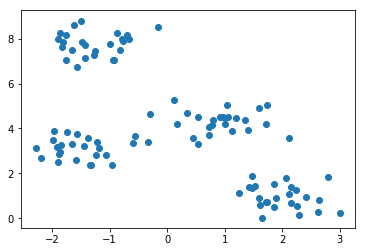

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

K-meansの学習に必要な要素を順番に作成していきます。

### 【問題1】中心点の初期値を決める
入力されたデータから $K$ 個の中心点 $\mu_1$ から $\mu_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 $\mu$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

#### 回答

In [5]:
def init_myu_(X, k):
    """
    データの中からランダムな中心点μをk個作成する関数
    Parameter
    ----------
    X：ndarray(n_samples, n_features)
        使うデータ
    k：int
        作成する中心点μの数(クラスタ数)
    
    Return
    ----------
    init_myu：ndarray(n_clusters, n_features)
        中心点μ
    """
    m = len(X) #サンプル数
    np.random.seed(1)
    idx = np.random.randint(m, size=k) #0以上m未満の整数をk個ランダムに生成
    
    init_myu = X[idx, :]
    
    return init_myu

### 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する $r_{nk}$ と $\mu_k$ を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE = \sum_{n=1}^{N}\sum_{k=1}^{K}r_{nk}||X_n - μ_k||^2
$$


$n$ : データ点のインデックス


$k$ : クラスタのインデックス


$X_n$ : $n$番目のデータ点


$\mu_k$ : $k$番目の中心点


$r_{nk}$ : データ点$X_n$がクラスタ$k$に所属していたら1、そうでなければ0

#### 回答

In [6]:
def sse_score(myu, cluster, X):
    """
    クラスタ内誤差平方和（Sum of Squared Errors）を計算する関数
    
    Parameter
    ----------
    myu：ndarray(n_clusters, n_features)
        中心点μ
    cluster：ndarray(n_samples, )
        所属クラスタ
    X：ndarray(n_samples, n_features)
        使用するデータ
    
    Return
    ----------
    sse：float
        クラスタ内誤差平方和
    """
    sse = 0
    for i in range(X.shape[0]): #サンプル数分ループ
        for i_ in range(myu.shape[0]): #中心点の数分ループ
            if cluster[i] == (i_+1):
                rnk = 1
            else:
                rnk = 0
            sse += rnk*np.linalg.norm((X[i] - myu[i_]), ord=2)
    
    return sse

### 【問題3】クラスタへの割り当て
全てのデータ点 $X_n$ を最も近い中心点 $\mu_k$ に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$ に対しては以下の数式で表現できます。

$$
||q -p|| = \sqrt{(q - p)(q - p)}
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


[numpy.linalg.norm — NumPy v1.17 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)


中心点 $\mu_k$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

#### 回答

In [7]:
def clustering(init_myu, X):
    """
    各中心点とデータのベクトルからユークリッド距離を計算して、
    最も近い中心点のクラスタに割り当てる関数
    
    Parameter
    ----------
    init_myu：ndarray(n_clusters, n_features)
        中心点μ
    X：ndarray(n_samples, n_features)
        使うデータ
    
    Return
    ----------
    cluster：ndarray(n_samples, )
        所属クラスタ
    """
    cluster = np.zeros(X.shape[0])
    
    for i in range(X.shape[0]):
        distance_list = [] #リストの初期化
        for myu in init_myu:
            distance = np.linalg.norm((X[i] - myu), ord=2)
            distance_list.append(distance)
        cluster[i] = distance_list.index(min(distance_list)) + 1 #所属クラスタ(int:1~k)の決定
    
    return cluster

### 【問題4】中心点の移動
中心点 $\mu_k$ を $k$ 番目のクラスタに割り当てられる全てのデータ点 $X_n$ の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て $r_{nk}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

#### 回答

In [8]:
def center_gravity(myu, cluster, X):
    """
    各クラスタの中心点を、各クラスタの重心に移動させる関数
    
    Parameter
    ----------
    myu：ndarray(n_clusters, n_features)
        中心点μ
    cluster：ndarray(n_samples, )
        所属クラスタ
    X：ndarray(n_samples, n_features)
        使うデータ
    
    Return
    ----------
    new_myu：ndarray(n_clusters, n_features)
        重心
    """
    #保存用配列
    new_myu = np.zeros((len(myu), X.shape[1]))
    
    #clusters = np.unique(cluster)
    
    #Xの最終列に所属クラスタを追加
    X_ = np.concatenate([X, cluster.reshape(-1, 1)], axis=1)
    
    #クラスター毎にXデータ抜き出す
    for i in range(len(myu)):
        X__ = X_[np.where(X_[:, -1]==(i + 1))[0], :-1] # (i+1)クラスタの行を抜き出す
        new_myu[i] = np.mean(X__, axis=0) #抜き出したndarrayの列方向の平均をとる
    
    return new_myu

### 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点 $\mu_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

#### 回答
ScratchKMeansクラスのfitメソッド内に記載

### 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 $\mu_k$ を保持しておきます。

#### 回答
ScratchKMeansクラスのfitメソッド内に記載

### 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


- データ点 $X_n$ と学習で決まった中心点 $\mu_k$ に対し、 $SSE$ を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。


- データ点 $X_n$ を最も近い $\mu_k$ に割り当てる。

#### 回答
ScratchKMeansクラスのpredictメソッド内に記載

In [23]:
np.set_printoptions(threshold=np.inf)

model = ScratchKMeans(n_clusters=4, n_init=5, max_iter=200, tol=1)
model.fit(X)
model.predict(X).astype('int')

array([1, 4, 1, 1, 1, 1, 3, 4, 1, 4, 4, 4, 4, 4, 4, 2, 2, 3, 3, 2, 1, 4,
       3, 2, 1, 3, 3, 1, 2, 2, 2, 4, 2, 2, 3, 1, 4, 2, 4, 3, 1, 3, 4, 3,
       3, 4, 2, 3, 1, 1, 1, 2, 3, 3, 3, 4, 4, 2, 2, 4, 4, 2, 2, 1, 2, 4,
       3, 3, 2, 1, 4, 2, 1, 4, 1, 1, 3, 3, 2, 2, 2, 4, 3, 1, 2, 3, 2, 2,
       1, 1, 1, 3, 1, 3, 3, 4, 4, 3, 4, 1])

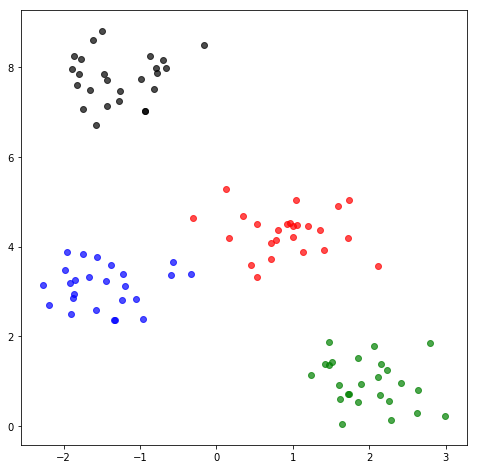

In [24]:
y_pred = model.predict(X)
y_pred = y_pred.astype('int')

c_map = ['r', 'g', 'b', 'k']

plt.figure(figsize=(8, 8))

for cluster in np.unique(y_pred):
    index = np.where(y_pred == cluster)
    plt.scatter(X[index, 0], X[index, 1], marker="o", alpha=0.7, c=c_map[cluster-1])

plt.show()

クラスタリングできている。

### 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 $k$ は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 $k$ を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

#### 回答

In [11]:
sse_list_ = []

max_cluster_num = 9
for i in range(2, max_cluster_num):
    model = ScratchKMeans(n_clusters=i, n_init=3, max_iter=300, tol=0.0001)
    model.fit(X)
    sse_list_.append(model.best_sse)

for sse in sse_list_:
    print(sse)

/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


169.51988741812653
103.63271391895243
62.63796180120853
58.89147154546096
57.180901476342726
51.250545210654494
51.01215146925938


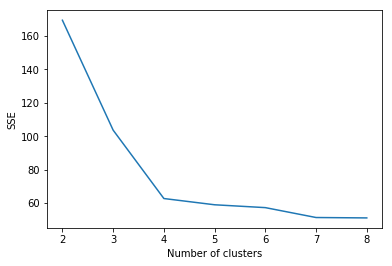

In [12]:
plt.plot(sse_list_)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.xticks([0, 1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7, 8])
plt.show()

---

クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


[UCI Machine Learning Repository: Wholesale customers Data Set](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。


金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [13]:
original_data = pd.read_csv('Wholesale customers data.csv')
original_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
print("Channel:", np.unique(original_data["Channel"].values))
print("Region:", np.unique(original_data["Region"].values))

Channel: [1 2]
Region: [1 2 3]


Channel : Horeca(ホテル/レストラン/カフェ), Retail(小売店)  
Region : Liston, Oportoor, other

In [15]:
data = original_data.drop(["Region", "Channel"], axis=1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


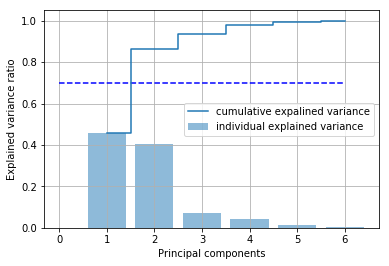

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

cumulative expalined variance：累積説明分散  
individual explained variance：個人説明差異

In [18]:
np.set_printoptions(threshold=0)
display(data_pca)
data_pca.shape

array([[   650.02212207,   1585.51909007],
       [ -4426.80497937,   4042.45150884],
       [ -4841.9987068 ,   2578.762176  ],
       ...,
       [  4555.11499863,  26201.75860287],
       [ -2734.37092005,  -7070.77533531],
       [-10370.12531409,  -6161.46490876]])

(440, 2)

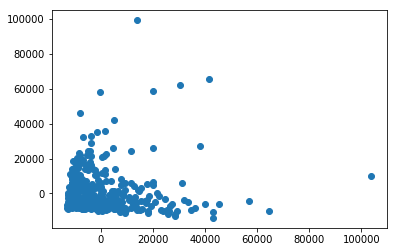

In [19]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.show()

データが密集していて、綺麗にクラスタリングできるようには見えない。

### 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。



/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


3928114.776098505
3369438.7766169803
2938928.609496256
2725625.577443135
2442682.5571414395
2210187.3277351484
2074631.3749592658


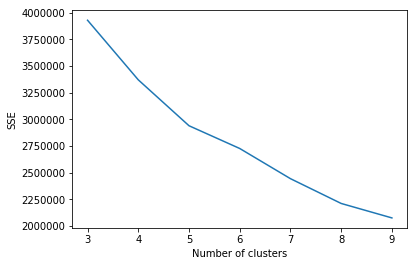

In [25]:
sse_list_ = []

max_cluster_num = 10
for i in range(3, max_cluster_num):
    model = ScratchKMeans(n_clusters=i, n_init=3, max_iter=100, tol=0.0001)
    model.fit(data_pca)
    sse_list_.append(model.best_sse)

for sse in sse_list_:
    print(sse)

plt.plot(sse_list_)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.xticks([i for i in range(10-3)], [i for i in range(3, 10)])
plt.show()

/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


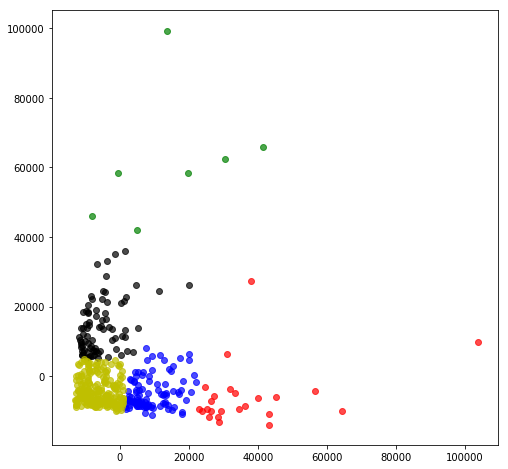

In [27]:
model_ = ScratchKMeans(n_clusters=5, n_init=5, max_iter=200, tol=1)
model_.fit(data_pca)
y_pred = model_.predict(data_pca)
y_pred = y_pred.astype('int')

c_map = ['r', 'g', 'b', 'k', 'y']

plt.figure(figsize=(8, 8))

for cluster in np.unique(y_pred):
    index = np.where(y_pred == cluster)
    plt.scatter(data_pca[index, 0], data_pca[index, 1], marker="o", alpha=0.7, c=c_map[cluster-1])

plt.show()

#### 回答
(顕著ではないが)エルボー法の観点から、クラスター数5が最適と考える。

卸売業者がデータ収集した目的が、  
「どういった層の顧客が高い売上に繋がっているのか把握したい」  
だと仮定すると、  
今後クラスター毎に営業戦略の立案等進めると思うが、その点から観てもクラスター数5というのは妥当だと考える。

### 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

#### 回答

In [30]:
original_data['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

地域はほとんどがother

In [29]:
original_data['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

卸先はおおよそ2:1の割合でHoreca

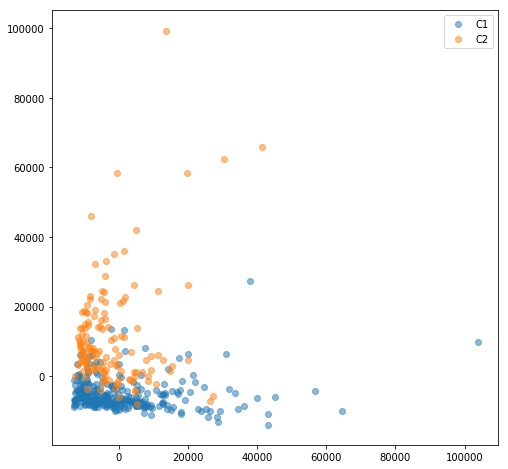

In [54]:
#Channnelで可視化
df_pca = pd.DataFrame(data_pca)
df_pca["Channel"] = original_data['Channel']

df_pca_c1 = df_pca.query("Channel == 1").values
df_pca_c2 = df_pca.query("Channel == 2").values

plt.figure(figsize=(8, 8))

plt.scatter(df_pca_c1[:, 0], df_pca_c1[:, 1], label="C1", alpha=0.5)
plt.scatter(df_pca_c2[:, 0], df_pca_c2[:, 1], label="C2", alpha=0.5)
plt.legend()
plt.show()

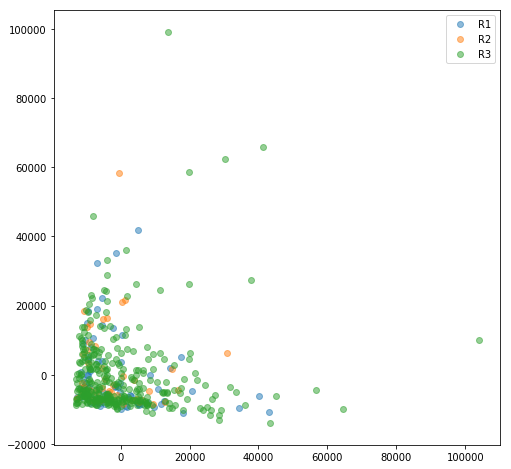

In [58]:
#Regionで可視化
df_pca = pd.DataFrame(data_pca)
df_pca["Region"] = original_data['Region']

df_pca_r1 = df_pca.query("Region == 1").values
df_pca_r2 = df_pca.query("Region == 2").values
df_pca_r3 = df_pca.query("Region == 3").values

plt.figure(figsize=(8, 8))

plt.scatter(df_pca_r1[:, 0], df_pca_r1[:, 1], label="R1", alpha=0.5)
plt.scatter(df_pca_r2[:, 0], df_pca_r2[:, 1], label="R2", alpha=0.5)
plt.scatter(df_pca_r3[:, 0], df_pca_r3[:, 1], label="R3", alpha=0.5)

plt.legend()
plt.show()

#### 回答
Channelでは上手く分類できているが、Regionでは分類できていない。  
単純にChannel毎に営業戦略を練るのでも結果はついてきそう。  
各Channel毎でクラスタリングをすればまた何か特徴が見えてくるかもしれない。  
Regionはクラスタリングの観点からは、良い特徴量ではないと言える。

### 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。


《ヒント》


前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。


条件ごとにデータを見る際にはPandasのgroupbyが便利です。


[pandas.DataFrame.groupby — pandas 0.23.4 documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

#### 回答

In [61]:
#要約統計量
original_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


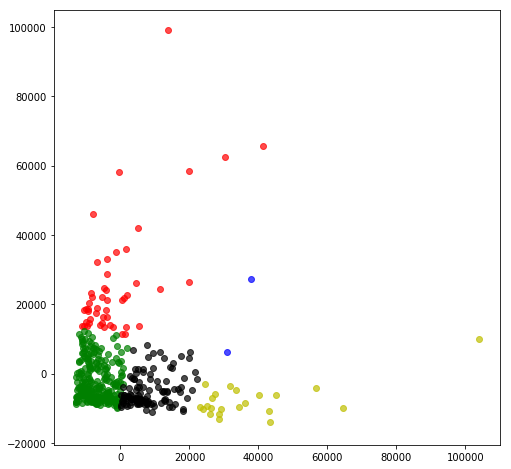

In [67]:
#6個の特徴量をそのまま使ったクラスタリング

#display(data)

model__ = ScratchKMeans(n_clusters=5, n_init=5, max_iter=200, tol=1)
model__.fit(data.values)
y_pred = model__.predict(data.values)
y_pred = y_pred.astype('int')

c_map = ['r', 'g', 'b', 'k', 'y']

plt.figure(figsize=(8, 8))

for cluster in np.unique(y_pred):
    index = np.where(y_pred == cluster)
    plt.scatter(data_pca[index, 0], data_pca[index, 1], marker="o", alpha=0.7, c=c_map[cluster-1])

plt.show()

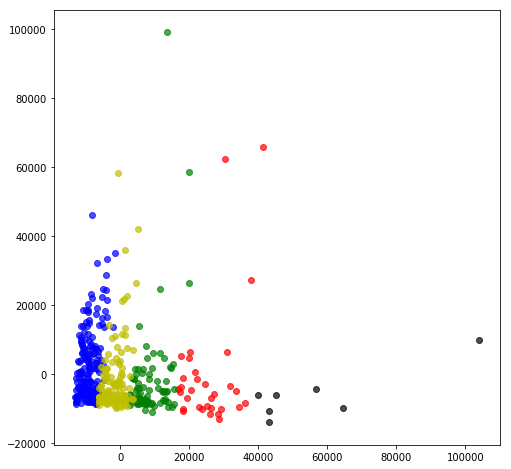

In [76]:
#Freshのみ使ったクラスタリング

data_fresh = data["Fresh"]

model__ = ScratchKMeans(n_clusters=5, n_init=5, max_iter=200, tol=1)
model__.fit(data_fresh.values.reshape(-1, 1))
y_pred = model__.predict(data_fresh.values.reshape(-1, 1))
y_pred = y_pred.astype('int')

c_map = ['r', 'g', 'b', 'k', 'y']

plt.figure(figsize=(8, 8))

for cluster in np.unique(y_pred):
    index = np.where(y_pred == cluster)
    plt.scatter(data_pca[index, 0], data_pca[index, 1], marker="o", alpha=0.7, c=c_map[cluster-1])

plt.show()

- 売り上げの多くを占めているFreshに着目して戦略を練るのがコストパフォーマンスが良さそう
- channelをもっと細分化してchannel毎のクラスタリングをすると、Freshのみ使ったクラスタリングと何か関係性が見えてくるかもしれない
- channelは顧客先の規模や業種によって分け、各グループ毎に営業戦略を練るのが良いのではないか